In [2]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
books = pd.read_csv('books_data/books.csv', sep=";", encoding="latin-1", on_bad_lines='skip')
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
                 'imageUrlS', 'imageUrlM', 'imageUrlL']
books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'], axis=1, inplace=True)

users = pd.read_csv('books_data/users.csv', sep=';', encoding="latin-1", on_bad_lines='skip')
users.columns = ['userID', 'Location', 'Age']
users.drop(['Location'], axis=1, inplace=True)

ratings = pd.read_csv('books_data/ratings.csv', sep=';', encoding="latin-1", on_bad_lines='skip')
ratings.columns = ['userID', 'ISBN', 'bookRating']

print(books.shape)
print(users.shape)
print(ratings.shape)

C:\Users\saiad\AppData\Local\Temp\ipykernel_8884\3462772432.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('books_data/books.csv', sep=";", encoding="latin-1", on_bad_lines='skip')


(271360, 5)
(278858, 2)
(1149780, 3)


In [5]:
# books = pd.read_csv('books.csv',sep=";",error_bad_lines=False, encoding="latin-1")
# books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
#                  'imageUrlS', 'imageUrlM', 'imageUrlL']
# books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'],axis=1,inplace=True)
# users = pd.read_csv('users.csv', sep=';',
#                     error_bad_lines=False, encoding="latin-1")
# users.columns = ['userID', 'Location', 'Age']
# users.drop(['Location'],axis=1,inplace=True)
# ratings = pd.read_csv('ratings.csv', sep=';',
#                       error_bad_lines=False, encoding="latin-1")
# ratings.columns = ['userID', 'ISBN', 'bookRating']
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 5)
(278858, 2)
(1149780, 3)


In [6]:
display(books.head(10))
display(users.head(10))
display(ratings.head(10))

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner


,userID,Age
0,1,NaN
1,2,18.0
2,3,NaN
3,4,17.0
4,5,NaN
5,6,61.0
6,7,NaN
7,8,NaN
8,9,NaN
9,10,26.0


,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [7]:
books['yearOfPublication'] = pd.to_numeric(books['yearOfPublication'], errors='coerce')
books = books.dropna(subset=['yearOfPublication','ISBN'])
books['yearOfPublication'] = books['yearOfPublication'].astype(int)
print(books.shape)

(271357, 5)


In [8]:
df1 = pd.merge(ratings,users,on='userID',how='inner')
prefinal = pd.merge(df1,books,on='ISBN',how='inner')
final=prefinal.sort_values(by='userID', ascending=True)
print(final.shape)

(1031132, 8)


In [9]:
final.describe()

,userID,bookRating,Age,yearOfPublication
count,1.031132e+06,1.031132e+06,753299.000000,1.031132e+06
mean,1.405944e+05,2.839056e+00,37.397681,1.968195e+03
std,8.052476e+04,3.854159e+00,14.098255,2.311015e+02
min,2.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,7.041500e+04,0.000000e+00,28.000000,1.992000e+03
50%,1.412100e+05,0.000000e+00,35.000000,1.997000e+03
75%,2.114260e+05,7.000000e+00,45.000000,2.001000e+03
max,2.788540e+05,1.000000e+01,244.000000,2.050000e+03


In [10]:
final.isnull().sum()

userID                    0
ISBN                      0
bookRating                0
Age                  277833
bookTitle                 0
bookAuthor                1
yearOfPublication         0
publisher                 2
dtype: int64

In [11]:
print(final.dtypes)
final = final.dropna(subset=['Age','bookAuthor','publisher'])
print(final.shape)
print()
display(final.head(25))

userID                 int64
ISBN                  object
bookRating             int64
Age                  float64
bookTitle             object
bookAuthor            object
yearOfPublication      int32
publisher             object
dtype: object
(753296, 8)



,userID,ISBN,bookRating,Age,bookTitle,bookAuthor,yearOfPublication,publisher
185192,2,0195153448,0,18.0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
185309,10,1841721522,0,26.0,New Vegetarian: Bold and Beautiful Recipes for...,Celia Brooks Brown,2001,Ryland Peters &amp; Small Ltd
185581,19,0375759778,7,14.0,Prague : A Novel,ARTHUR PHILLIPS,2003,Random House Trade Paperbacks
185608,20,0425163091,0,19.0,Chocolate Jesus,Stephan Jaramillo,1998,Berkley Publishing Group
185692,36,067176537X,0,24.0,The Therapeutic Touch: How to Use Your Hands t...,Dolores Krieger,1979,Fireside
185761,42,0553582747,7,17.0,From the Corner of His Eye,Dean Koontz,2001,Bantam Books
185926,44,0812523873,0,51.0,Proxies,Laura J. Mixon,1999,Tor Books
147553,44,042518630X,0,51.0,Purity in Death,J.D. Robb,2002,Berkley Publishing Group
131467,44,0425182908,0,51.0,Isle of Dogs,Patricia Cornwell,2002,Berkley Publishing Group
185927,44,0842342702,0,51.0,Left Behind: A Novel of the Earth's Last Days ...,Tim Lahaye,2000,Tyndale House Publishers


In [12]:
final.isnull().sum()

userID               0
ISBN                 0
bookRating           0
Age                  0
bookTitle            0
bookAuthor           0
yearOfPublication    0
publisher            0
dtype: int64

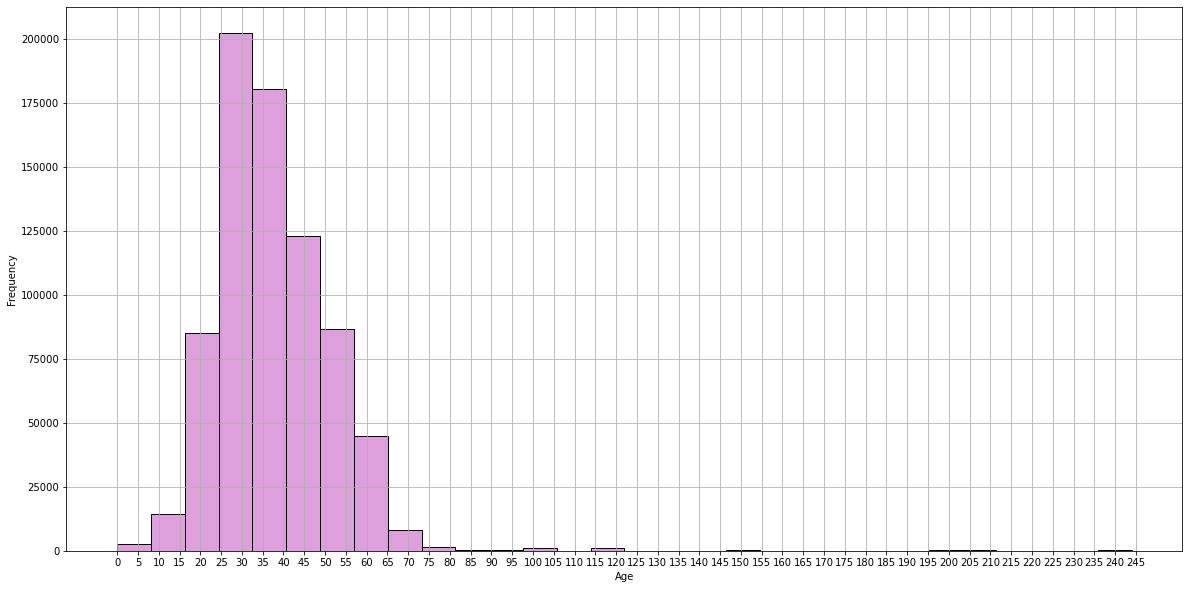

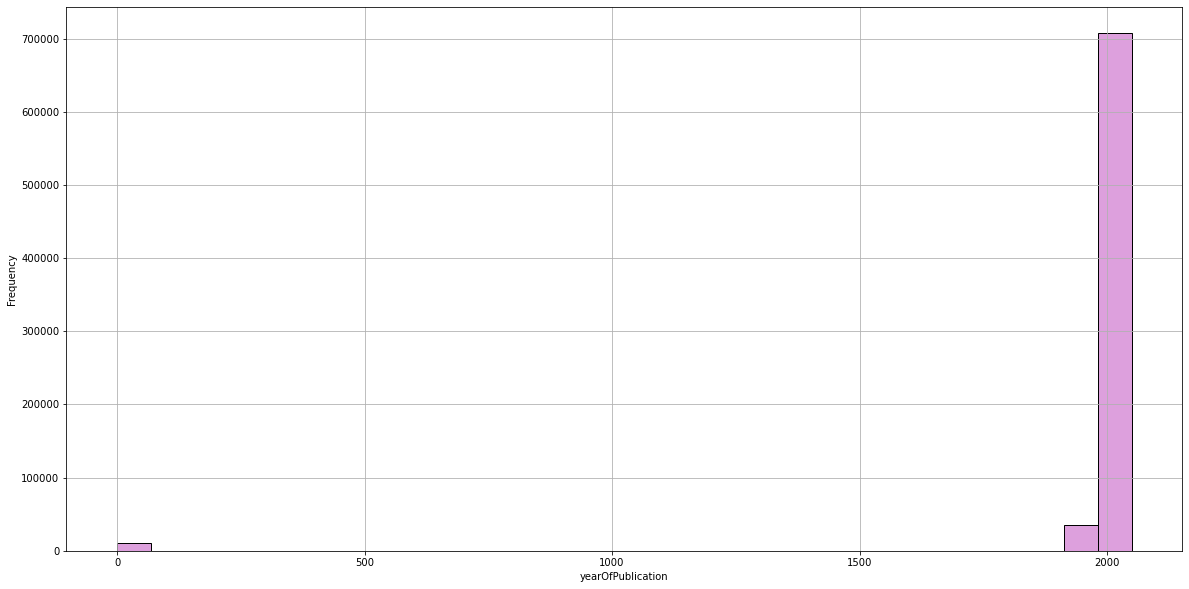

In [13]:
plt.figure(figsize=(20, 10))
plt.hist(final['Age'], bins=30, color='plum', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(0, 250, 5))
plt.grid(True)
plt.show()
print()
plt.figure(figsize=(20, 10))
plt.hist(final['yearOfPublication'], bins=30, color='plum', edgecolor='black')
plt.xlabel('yearOfPublication')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [14]:
final = final[(final['Age'] >= 10) & (final['Age'] <= 100)]
final = final[(final['yearOfPublication'] >= 1800) & (final['yearOfPublication'] <= 2024)]
print()
print(final['userID'].value_counts())


198711    6357
153662    5789
98391     5777
76352     3310
110973    2949
          ... 
123021       1
122966       1
122965       1
122960       1
278852       1
Name: userID, Length: 52556, dtype: int64


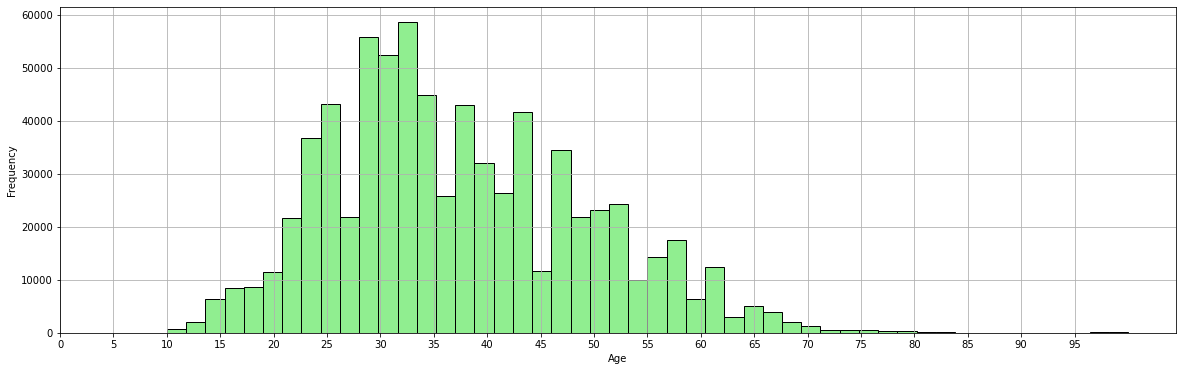

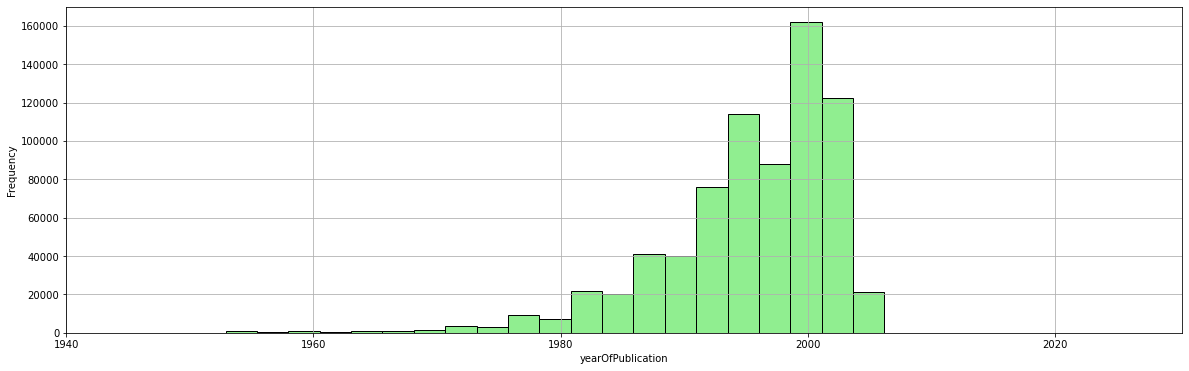

In [15]:
plt.figure(figsize=(20, 6))
plt.hist(final['Age'], bins=50, color='lightgreen', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(0, 100, 5))
plt.grid(True)
plt.show()
print()
plt.figure(figsize=(20, 6))
plt.hist(final['yearOfPublication'], bins=50, color='lightgreen', edgecolor='black')
plt.xlabel('yearOfPublication')
plt.xlim(left=1940)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [16]:
final.drop(final[final['bookRating'] == 0].index, inplace=True)
print(final.shape)

(263145, 8)


In [17]:
user_rating_counts = final['userID'].value_counts()
users_over_2000 = user_rating_counts[user_rating_counts > 2000].index
final = final[~final['userID'].isin(users_over_2000)]
final.shape

(257456, 8)

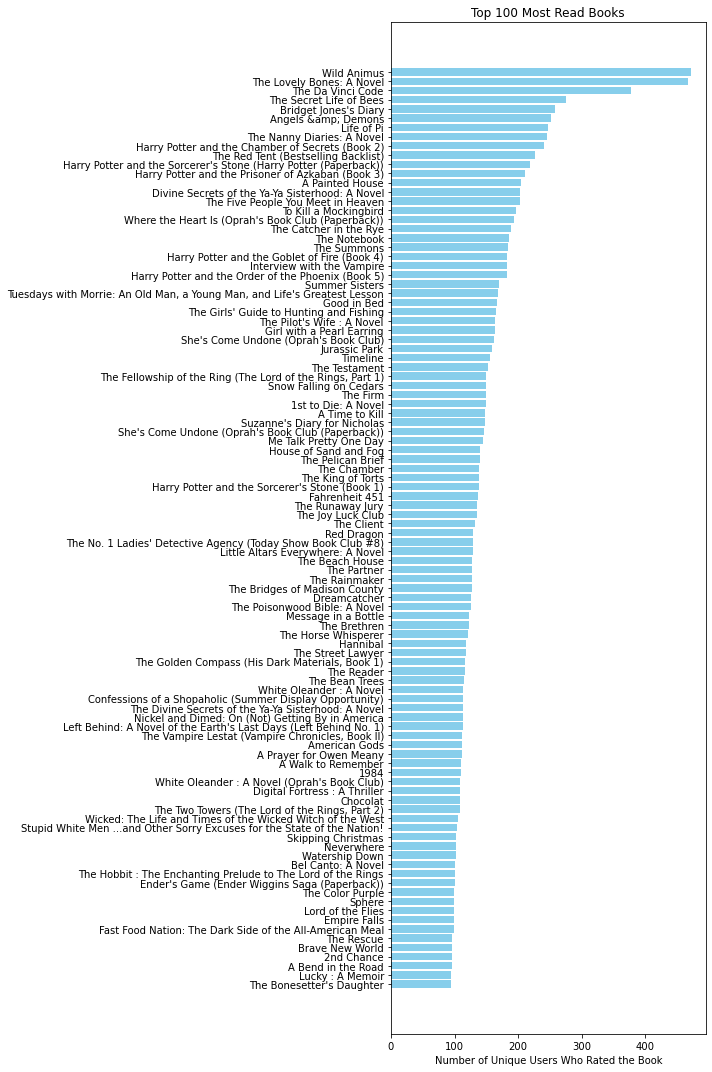

In [18]:
most_read_books = final.groupby('bookTitle')['userID'].nunique().reset_index(name='userCount')
most_read_books_sorted = most_read_books.sort_values('userCount', ascending=False)
top_100_books = most_read_books_sorted.head(100)

plt.figure(figsize=(10, 15))
plt.barh(top_100_books['bookTitle'][::-1], top_100_books['userCount'][::-1], color='skyblue')
plt.xlabel('Number of Unique Users Who Rated the Book')
plt.title('Top 100 Most Read Books')

plt.tight_layout()
plt.show()

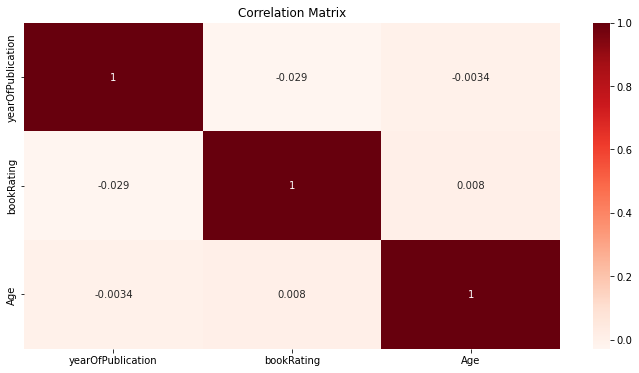

In [19]:
import seaborn as sns
corr_matrix = final[['yearOfPublication', 'bookRating', 'Age']].corr()
#Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 6))

sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.title('Correlation Matrix')
plt.show()

In [20]:
mean_values = final[['bookRating','Age','yearOfPublication']].mean()
(mean_values)

bookRating              7.715213
Age                    36.441365
yearOfPublication    1995.608554
dtype: float64

In [21]:
# Group by userID and aggregate bookTitles
grouped_df = final.groupby('userID')['bookTitle'].apply(list).reset_index()
transactional_df = pd.DataFrame(grouped_df['bookTitle'].tolist(), index=grouped_df['userID']).reset_index()
transactional_df.columns = ['userID'] + [f'Book{i+1}' for i in range(transactional_df.shape[1]-1)]
# transactional_df = transactional_df.fillna('')
transactional_df.tail()


,userID,Book1,Book2,Book3,Book4,Book5,Book6,Book7,Book8,Book9,...,Book1824,Book1825,Book1826,Book1827,Book1828,Book1829,Book1830,Book1831,Book1832,Book1833
39548,278844,The Cider House Rules,Strangers In Paradise: It's A Good Life,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39549,278846,Brave New World,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39550,278849,Behind the Attic Wall (Avon Camelot Books (Pap...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39551,278851,"Then Again, Maybe I Won't",The Bachelor Home Companion: A Practical Guide...,1996-97 Texas Almanac and State Industrial Gui...,The Are You Being Served? Stories: 'Camping In...,"14,000 Things to Be Happy About",Why stop?: A guide to Texas historical roadsid...,Murphy's Law Book Two: More Reasons Why Things...,WebClasses From Scratch,All Elevations Unknown: An Adventure in the He...,...,None,None,None,None,None,None,None,None,None,None
39552,278852,Dave Barry's Only Travel Guide You'll Ever Need,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [22]:
transactional_df.columns

Index(['userID', 'Book1', 'Book2', 'Book3', 'Book4', 'Book5', 'Book6', 'Book7',
       'Book8', 'Book9',
       ...
       'Book1824', 'Book1825', 'Book1826', 'Book1827', 'Book1828', 'Book1829',
       'Book1830', 'Book1831', 'Book1832', 'Book1833'],
      dtype='object', length=1834)

In [23]:
transaction_data=transactional_df

In [24]:
final.columns

Index(['userID', 'ISBN', 'bookRating', 'Age', 'bookTitle', 'bookAuthor',
       'yearOfPublication', 'publisher'],
      dtype='object')

In [25]:
# Group by userID and aggregate bookTitles
transactional_df = final.groupby('userID')['bookTitle'].apply(list).reset_index()
transactional_df.head()


,userID,bookTitle
0,19,[Prague : A Novel]
1,42,[From the Corner of His Eye]
2,44,[This Year It Will Be Different: And Other Sto...
3,51,[The Street Lawyer]
4,56,"[Haveli (Laurel Leaf Books), LONESOME DOVE]"


In [26]:
transactional_df.shape

(39553, 2)

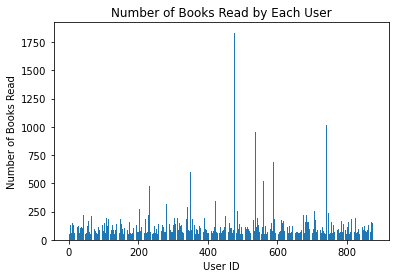

In [27]:
# Group by userID and count the number of books each user has read
user_book_counts = final.groupby('userID')['bookTitle'].count().reset_index()

ubc = user_book_counts[(user_book_counts['bookTitle'] < 2000) & (user_book_counts['bookTitle'] > 50)]

# Plotting
plt.bar(range(ubc['userID'].count()), ubc['bookTitle'])
plt.xlabel('User ID')
plt.ylabel('Number of Books Read')
plt.title('Number of Books Read by Each User')
plt.show()

In [28]:
user_book_counts.head()

,userID,bookTitle
0,19,1
1,42,1
2,44,1
3,51,1
4,56,2


In [29]:
ubc.head()

,userID,bookTitle
31,254,57
78,638,54
241,1733,91
260,1903,53
278,2033,129


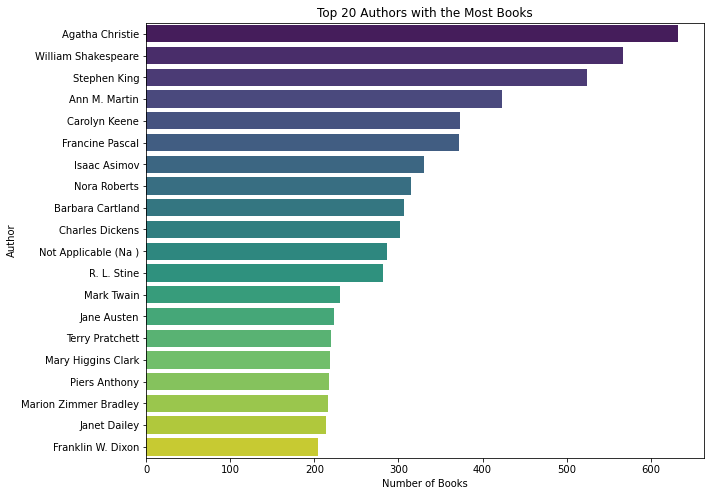

In [30]:
# Count the number of books per author
books_per_author = books['bookAuthor'].value_counts().reset_index()
books_per_author.columns = ['bookAuthor', 'NumberOfBooks']

# Display the top N authors with the most books
N = 20
top_authors = books_per_author.head(N)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='NumberOfBooks', y='bookAuthor', data=top_authors, palette='viridis')
plt.title(f'Top {N} Authors with the Most Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

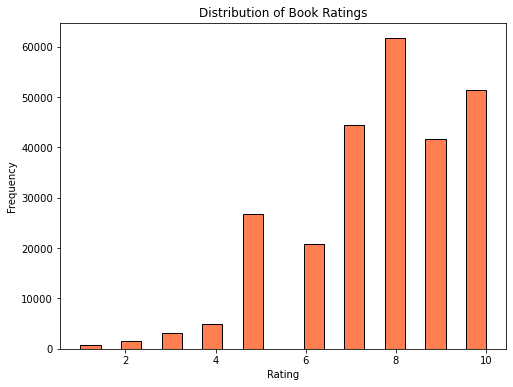

In [31]:
if final.empty:
    print("DataFrame is empty.")
else:
    # Convert 'bookRating' to numeric just in case it's not
    final['bookRating'] = pd.to_numeric(final['bookRating'], errors='coerce')
    final = final.dropna(subset=['bookRating'])

    # Now, try plotting again
    plt.figure(figsize=(8, 6))
    final['bookRating'].plot(kind='hist', bins=20, color='coral', edgecolor='black')
    plt.title('Distribution of Book Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()


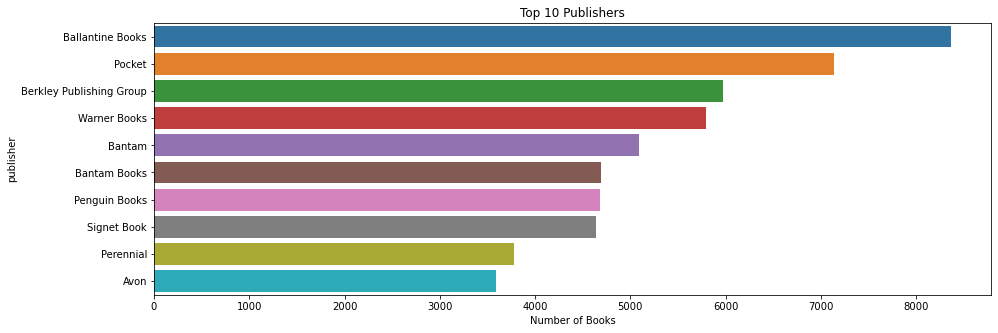

In [32]:
# Count plot for the top 10 publishers
top_publishers = final['publisher'].value_counts().head(10).index
plt.figure(figsize=(15, 5))
sns.countplot(data=final[final['publisher'].isin(top_publishers)], y='publisher', order=top_publishers)
plt.title('Top 10 Publishers')
plt.xlabel('Number of Books')
plt.show()


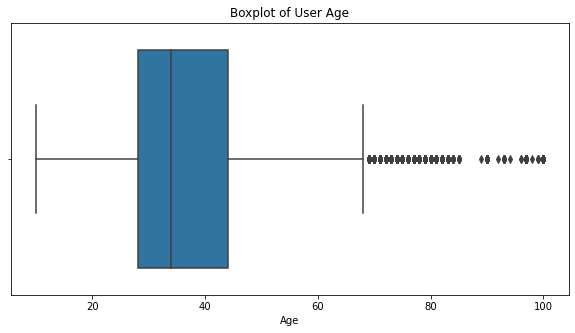

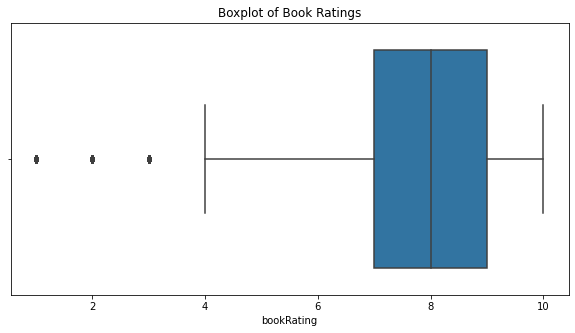

In [33]:
# Boxplot for age distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x=final['Age'])
plt.title('Boxplot of User Age')
plt.show()

# Boxplot for book ratings distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x=final['bookRating'])
plt.title('Boxplot of Book Ratings')
plt.show()


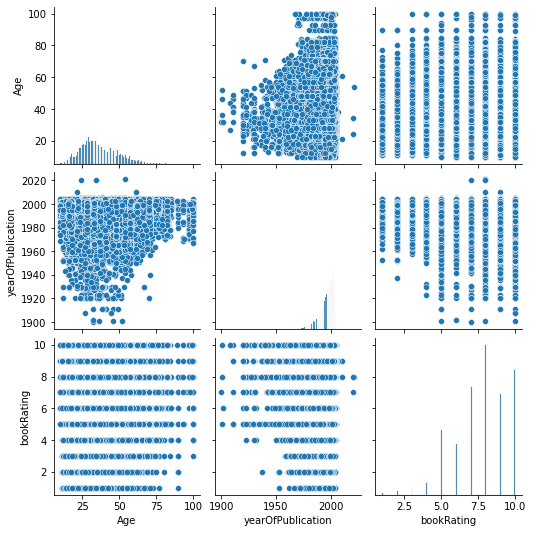

In [34]:
# Selecting a few columns for pairplot visualization
columns_to_plot = ['Age', 'yearOfPublication', 'bookRating']
sns.pairplot(final[columns_to_plot].dropna())
plt.show()


In [35]:
mean_ratings = final.groupby('userID')['bookRating'].mean().reset_index()

# Rename the columns for clarity
mean_ratings.columns = ['userID', 'meanRating']

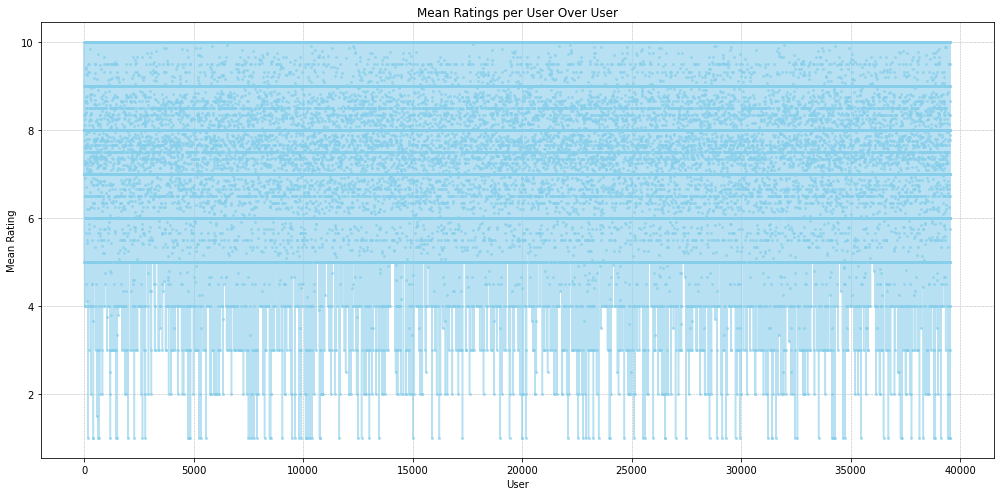

In [36]:
mean_ratings.reset_index(drop=True, inplace=True)

plt.figure(figsize=(14, 7))  # Adjust the figure size as needed

# Create a line plot
plt.plot(mean_ratings.index, mean_ratings['meanRating'], marker='o', linestyle='-', markersize=2, alpha=0.6, color='skyblue')

plt.title('Mean Ratings per User Over User')
plt.xlabel('User')
plt.ylabel('Mean Rating')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Improve readability
plt.tight_layout()

plt.show()

In [37]:
# Calculate the average book rating for each user
user_avg_rating = final.groupby('userID')['bookRating'].mean()

# Merge the average ratings back into the original DataFrame
final1 = pd.merge(final, user_avg_rating, on='userID', suffixes=('', '_avg'))

# Normalize each book rating by subtracting the user's average rating
final1['normalized_rating'] = final1['bookRating'] - final1['bookRating_avg']

final1.head(20)

,userID,ISBN,bookRating,Age,bookTitle,bookAuthor,yearOfPublication,publisher,bookRating_avg,normalized_rating
0,19,0375759778,7,14.0,Prague : A Novel,ARTHUR PHILLIPS,2003,Random House Trade Paperbacks,7.000000,0.000000
1,42,0553582747,7,17.0,From the Corner of His Eye,Dean Koontz,2001,Bantam Books,7.000000,0.000000
2,44,0440223571,8,51.0,This Year It Will Be Different: And Other Stories,Maeve Binchy,1997,Dell,8.000000,0.000000
3,51,0440225701,9,34.0,The Street Lawyer,JOHN GRISHAM,1999,Dell,9.000000,0.000000
4,56,0679865691,9,24.0,Haveli (Laurel Leaf Books),SUZANNE FISHER STAPLES,1995,Laurel Leaf,8.000000,1.000000
5,56,0671623249,7,24.0,LONESOME DOVE,Larry McMurtry,1986,Pocket,8.000000,-1.000000
6,64,2070423204,7,32.0,Lieux dits,Michel Tournier,2002,Gallimard,7.000000,0.000000
7,67,0394743741,7,43.0,The yawning heights,Aleksandr Zinoviev,1980,Random House,7.000000,0.000000
8,70,1414035004,10,44.0,The Adventures of Drew and Ellie: The Magical ...,Charles Noland,2003,1stBooks Library,10.000000,0.000000
9,75,1558531025,5,37.0,Life's Little Instruction Book (Life's Little ...,H. Jackson Brown,1991,Thomas Nelson,5.000000,0.000000


In [38]:
mean_ratings2 = final1.groupby('userID')['normalized_rating'].mean().reset_index()

# Rename the columns for clarity
mean_ratings2.columns = ['userID', 'normalized_rating']

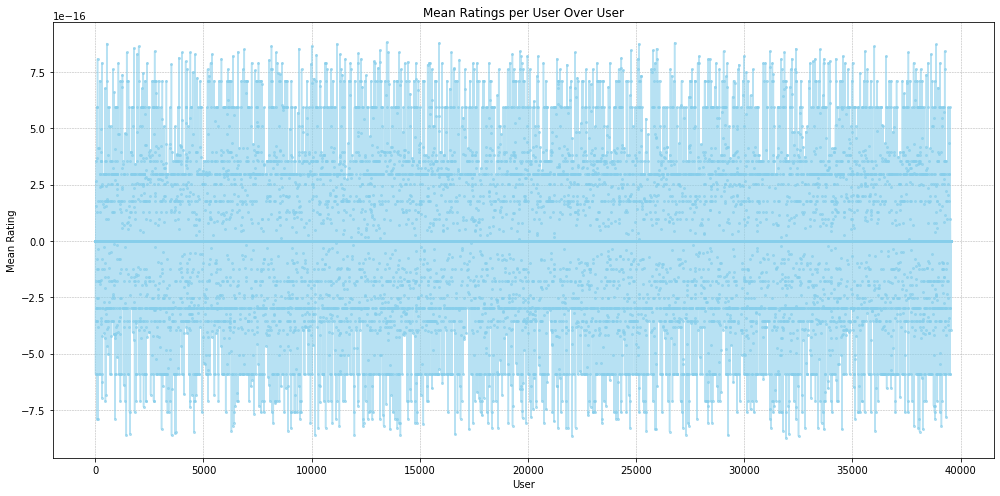

In [39]:
mean_ratings2.reset_index(drop=True, inplace=True)

plt.figure(figsize=(14, 7))  # Adjust the figure size as needed

# Create a line plot
plt.plot(mean_ratings2.index, mean_ratings2['normalized_rating'], marker='o', linestyle='-', markersize=2, alpha=0.6, color='skyblue')

plt.title('Mean Ratings per User Over User')
plt.xlabel('User')
plt.ylabel('Mean Rating')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Improve readability
plt.tight_layout()

plt.show()

In [40]:
from collections import defaultdict
from itertools import combinations
from tqdm import tqdm

def eclat(transactions, min_support):
    # Step 1: Convert transactions to vertical data format
    vertical_data = defaultdict(list)
    for tid, transaction in enumerate(tqdm(transactions, desc="Converting transactions to vertical data")):
        for item in transaction:
            vertical_data[item].append(tid)

    # Step 2: Get frequent single-item itemsets
    frequent_itemsets = []
    for item, tids in tqdm(vertical_data.items(), desc="Getting frequent single-item itemsets"):
        support = len(tids)
        if support >= min_support:
            frequent_itemsets.append(([item], tids))
    print(frequent_itemsets)
    answer = []
    answer.extend(frequent_itemsets)

    # Step 3: Generate frequent itemsets
    k = 2
    while True:
        candidates = generate_candidates(frequent_itemsets, k)
        answer.extend(candidates)
        if not candidates:
            break
        frequent_itemsets = candidates
        print(frequent_itemsets)
        k += 1

    return answer, vertical_data

def generate_candidates(frequent_itemsets, k):
    candidates = []
    itemsets = [itemset for itemset, _ in frequent_itemsets]
    for itemset_pair in tqdm(combinations(itemsets, 2), desc=f"Generating candidates (k={k})"):
        itemset1, itemset2 = itemset_pair
        union_itemset = set(itemset1) | set(itemset2)
        if len(union_itemset) == k:
            candidate = list(set(sorted(union_itemset)))
            if candidate not in [itemset for itemset, _ in candidates]:
                tids1 = [tids for itemset, tids in frequent_itemsets if itemset == itemset1][0]
                tids2 = [tids for itemset, tids in frequent_itemsets if itemset == itemset2][0]
                candidate_tids = intersect(tids1, tids2)
                if len(candidate_tids) >= min_support:
                    candidates.append((candidate, candidate_tids))
    return candidates

def intersect(tids1, tids2):
    return [tid for tid in tids1 if tid in tids2]

def generate_association_rules(frequent_itemsets, vertical_data, min_confidence):
    association_rules = []
    for itemset, tids in tqdm(frequent_itemsets, desc="Generating association rules"):
        if len(itemset) > 1:
            for i in range(1, len(itemset)):
                for antecedent in combinations(itemset, i):
                    antecedent = list(antecedent)
                    consequent = [item for item in itemset if item not in antecedent]
                    antecedent_tids = set([tid for item in antecedent for tid in vertical_data[item]])
                    itemset_tids = set(tids)
                    confidence = len(itemset_tids) / len(antecedent_tids)
                    if confidence >= min_confidence:
                        association_rules.append((antecedent, consequent, confidence))
    return association_rules

def convert_to_transactions(transaction_data):
    transactions = []
    for _, row in tqdm(transaction_data.iterrows(), desc="Converting transaction data to transactions"):
        transaction = [item for item in row[1:] if pd.notnull(item)]
        transactions.append(transaction)
    return transactions

transactions = convert_to_transactions(transaction_data)
min_support = 30
min_confidence = 0.4

frequent_itemsets, vertical_data = eclat(transactions, min_support)
association_rules = generate_association_rules(frequent_itemsets, vertical_data, min_confidence)

# Print the frequent itemsets
print("Frequent Itemsets:")
for itemset, tids in frequent_itemsets:
    print(f"Itemset: {itemset}, Support: {len(tids)}")

# Print the association rules
print("\nAssociation Rules:")
cnt = 0
for antecedent, consequent, confidence in association_rules:
    print(f"{cnt}::{antecedent} => {consequent}, Confidence: {confidence:.2f}")
    cnt += 1

# Print the vertical data
# print("\nVertical Data:")
# for item, tids in vertical_data.items():
#     print(f"Item: {item}, Transaction IDs: {tids}")

Converting transaction data to transactions: 0it [00:00, ?it/s]

Converting transaction data to transactions: 39553it [01:25, 464.45it/s]
Getting frequent single-item itemsets: 100%|██████████| 103788/103788 [00:00<00:00, 1875725.71it/s]


[(['From the Corner of His Eye'], [1, 998, 2328, 3551, 3781, 3845, 4370, 4453, 5653, 6229, 6950, 7550, 7810, 7882, 8677, 9529, 10091, 10265, 10374, 11192, 12042, 12456, 13097, 13463, 13617, 13617, 14809, 14983, 15163, 15384, 15746, 18097, 18297, 18376, 19170, 20396, 21027, 21337, 22103, 23384, 23916, 24192, 24317, 25224, 25255, 25742, 28032, 29915, 31513, 31559, 31897, 32890, 33390, 34191, 34989, 35550, 35580, 35654, 38604, 38931]), (['The Street Lawyer'], [3, 954, 1026, 2485, 2991, 3451, 3544, 4238, 4375, 4470, 4781, 5115, 5515, 5796, 6021, 6198, 6610, 7342, 7755, 8500, 10018, 10547, 11442, 11548, 11680, 11933, 12413, 12617, 13021, 13846, 14554, 15211, 15373, 15893, 16210, 16238, 16283, 16417, 16962, 17000, 17839, 17970, 18041, 18228, 18282, 18570, 18726, 18814, 19090, 19604, 20528, 20690, 20743, 21053, 21070, 21118, 21409, 22591, 23088, 23526, 24004, 24185, 24548, 24983, 25621, 26148, 26282, 27183, 27351, 27705, 28280, 28466, 28680, 28781, 29083, 29537, 29625, 30268, 30822, 31067, 31

Generating candidates (k=2): 281625it [00:45, 6167.90it/s]


[(['The Da Vinci Code', 'Angels &amp; Demons'], [489, 566, 1450, 1539, 4017, 4363, 5347, 7887, 9521, 9783, 10003, 11508, 11537, 11753, 12584, 12722, 13122, 13236, 13482, 13734, 14293, 15557, 16060, 18207, 18689, 21468, 22432, 22453, 22540, 27346, 28092, 28157, 28465, 28872, 28897, 29262, 29625, 30883, 31955, 32333, 32414, 33372, 34033, 34530, 34967, 35194, 36030, 38609, 39160, 39173, 39228]), (['Harry Potter and the Chamber of Secrets (Book 2)', "Harry Potter and the Sorcerer's Stone (Book 1)"], [31, 31, 278, 888, 2827, 3085, 3960, 4104, 5075, 5251, 5641, 7346, 8137, 9835, 10406, 10781, 10984, 11120, 11977, 12519, 12903, 14303, 14443, 14690, 14908, 14937, 15364, 16238, 16400, 16603, 16831, 17550, 17737, 19448, 19627, 20126, 22207, 23287, 23930, 23984, 24195, 24775, 25456, 25493, 25903, 25928, 25929, 26821, 26932, 27342, 27829, 28650, 29420, 29924, 30525, 31722, 32064, 32471, 32666, 32928, 33855, 34027, 34055, 34771, 34853, 35195, 35871, 35871, 35972, 36062, 36516, 37336, 38093, 38470, 

Generating candidates (k=3): 595it [00:00, 147190.26it/s]


[(['Harry Potter and the Prisoner of Azkaban (Book 3)', 'Harry Potter and the Chamber of Secrets (Book 2)', "Harry Potter and the Sorcerer's Stone (Book 1)"], [31, 31, 278, 888, 2827, 3085, 4104, 5075, 7346, 8137, 9835, 10406, 10781, 11120, 11977, 12519, 12903, 14303, 14443, 14690, 14937, 15364, 16400, 16603, 17737, 19448, 19627, 20126, 23287, 23930, 23984, 24195, 24775, 25456, 25493, 25903, 25928, 25929, 26821, 26932, 27342, 27829, 28650, 29420, 29924, 30525, 32064, 32471, 32666, 32928, 33855, 34027, 34055, 34771, 35195, 35871, 35871, 35972, 36062, 37336, 38093, 38470, 38688, 39047, 39160]), (['Harry Potter and the Goblet of Fire (Book 4)', 'Harry Potter and the Chamber of Secrets (Book 2)', "Harry Potter and the Sorcerer's Stone (Book 1)"], [31, 31, 278, 888, 3085, 4104, 5075, 7346, 8137, 9835, 10406, 10781, 11120, 11977, 12519, 12903, 14303, 14443, 14937, 15364, 16400, 16603, 16831, 17737, 19448, 23287, 23930, 23984, 24195, 24775, 25456, 25493, 25903, 25928, 25929, 26821, 26932, 278

Generating candidates (k=4): 105it [00:00, 104857.60it/s]


[(['Harry Potter and the Goblet of Fire (Book 4)', 'Harry Potter and the Prisoner of Azkaban (Book 3)', 'Harry Potter and the Chamber of Secrets (Book 2)', "Harry Potter and the Sorcerer's Stone (Book 1)"], [31, 31, 278, 888, 3085, 4104, 5075, 7346, 8137, 9835, 10406, 10781, 11120, 11977, 12519, 12903, 14303, 14443, 14937, 15364, 16400, 16603, 17737, 19448, 23287, 23930, 23984, 24195, 24775, 25456, 25493, 25903, 25928, 25929, 26821, 26932, 27829, 28650, 29420, 32064, 32471, 32666, 32928, 34027, 34055, 34771, 35195, 35871, 35871, 35972, 36062, 38093, 38470, 38688, 39047, 39160]), (['Harry Potter and the Prisoner of Azkaban (Book 3)', 'Harry Potter and the Order of the Phoenix (Book 5)', 'Harry Potter and the Chamber of Secrets (Book 2)', "Harry Potter and the Sorcerer's Stone (Book 1)"], [278, 888, 5075, 7346, 9835, 11120, 11977, 12903, 14303, 14443, 14937, 15364, 16400, 16603, 19448, 19627, 24195, 24775, 25456, 25493, 25903, 25928, 27342, 29420, 30525, 32064, 32471, 32666, 32928, 34027

Generating candidates (k=5): 15it [00:00, ?it/s]


[(['Harry Potter and the Order of the Phoenix (Book 5)', 'Harry Potter and the Goblet of Fire (Book 4)', 'Harry Potter and the Chamber of Secrets (Book 2)', 'Harry Potter and the Prisoner of Azkaban (Book 3)', "Harry Potter and the Sorcerer's Stone (Book 1)"], [278, 888, 5075, 7346, 9835, 11120, 11977, 12903, 14303, 14443, 14937, 15364, 16400, 16603, 19448, 24195, 24775, 25456, 25493, 25903, 25928, 29420, 32064, 32471, 32666, 32928, 34027, 35195, 35871, 35871, 35972, 38470, 38688, 39047, 39160])]


Generating candidates (k=6): 0it [00:00, ?it/s]
Generating association rules: 100%|██████████| 808/808 [00:00<00:00, 80834.77it/s]


Frequent Itemsets:
Itemset: ['From the Corner of His Eye'], Support: 60
Itemset: ['The Street Lawyer'], Support: 118
Itemset: ['Rich Dad, Poor Dad: What the Rich Teach Their Kids About Money--That the Poor and Middle Class Do Not!'], Support: 33
Itemset: ['The Pillars of the Earth'], Support: 66
Itemset: ['Fast Women'], Support: 40
Itemset: ['Angels &amp; Demons'], Support: 253
Itemset: ['The Beach House'], Support: 130
Itemset: ['Dead Aim'], Support: 36
Itemset: ['Midnight in the Garden of Good and Evil: A Savannah Story'], Support: 77
Itemset: ['Little Altars Everywhere: A Novel'], Support: 129
Itemset: ['Fahrenheit 451'], Support: 138
Itemset: ['Rebecca'], Support: 53
Itemset: ['1984'], Support: 111
Itemset: ['Harry Potter and the Chamber of Secrets (Book 2)'], Support: 242
Itemset: ['American Gods'], Support: 111
Itemset: ["She's Come Undone (Oprah's Book Club)"], Support: 162
Itemset: ["The Bonesetter's Daughter"], Support: 96
Itemset: ['The Lion, the Witch, and the Wardrobe (The 

In [41]:
# Assuming your data frame is named 'df'
user_data = final.groupby('userID')[['bookTitle', 'Age']].apply(lambda x: list(x.values)).to_dict()

# Assuming frequent_itemsets is the list of frequent itemsets in the format [(itemset, tids), ...]
# frequent_itemsets = [...]

for itemset, _ in frequent_itemsets:
    itemset = set(itemset)
    if len(itemset)>=2:
        eligible_users = []
        for user_id, books_bought in user_data.items():
            books_bought_set = set([book_title for book_title, _ in books_bought])
            if itemset.issubset(books_bought_set):
                eligible_users.extend([age for _, age in books_bought])

        if eligible_users:
            mean_age = sum(eligible_users) / len(eligible_users)
            print(f"Mean age of users who bought {itemset}: {mean_age}")
        else:
            print(f"No users bought all items in {itemset}")

Mean age of users who bought {'The Da Vinci Code', 'Angels &amp; Demons'}: 38.32207124495042
Mean age of users who bought {'Harry Potter and the Chamber of Secrets (Book 2)', "Harry Potter and the Sorcerer's Stone (Book 1)"}: 31.282743637492242
Mean age of users who bought {'Harry Potter and the Prisoner of Azkaban (Book 3)', 'Harry Potter and the Chamber of Secrets (Book 2)'}: 34.099616174239046
Mean age of users who bought {'Harry Potter and the Chamber of Secrets (Book 2)', 'Harry Potter and the Goblet of Fire (Book 4)'}: 33.66834567901235
Mean age of users who bought {"Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))", 'Harry Potter and the Chamber of Secrets (Book 2)'}: 35.52795204238115
Mean age of users who bought {'Harry Potter and the Order of the Phoenix (Book 5)', 'Harry Potter and the Chamber of Secrets (Book 2)'}: 33.9088295687885
Mean age of users who bought {'The Two Towers (The Lord of the Rings, Part 2)', 'The Fellowship of the Ring (The Lord of the Rin

KeyboardInterrupt: 

C:\Users\saiad\AppData\Local\Temp\ipykernel_15844\3762035497.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


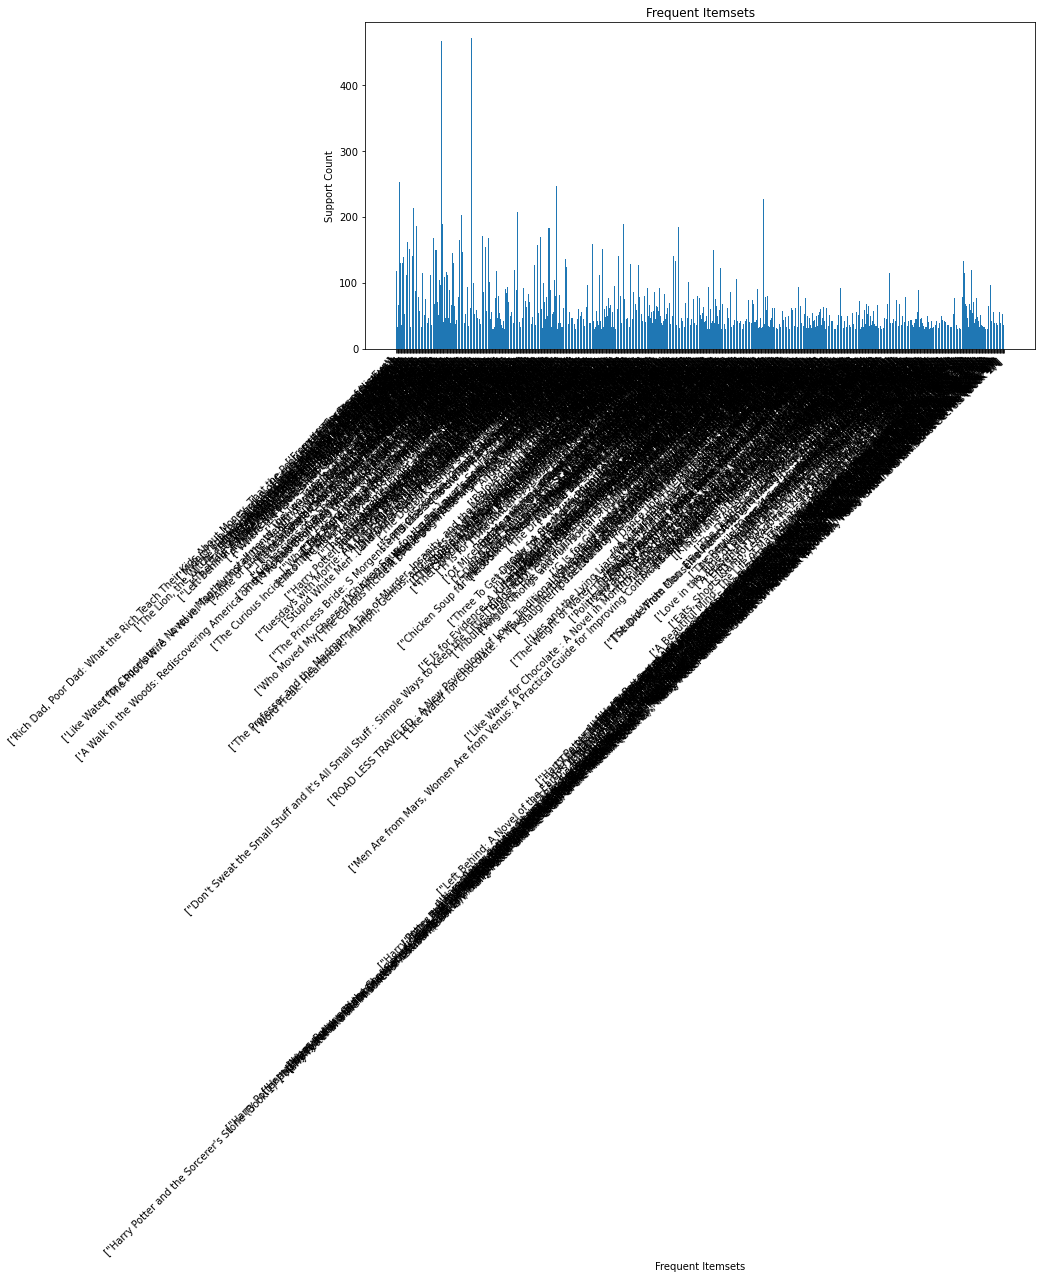

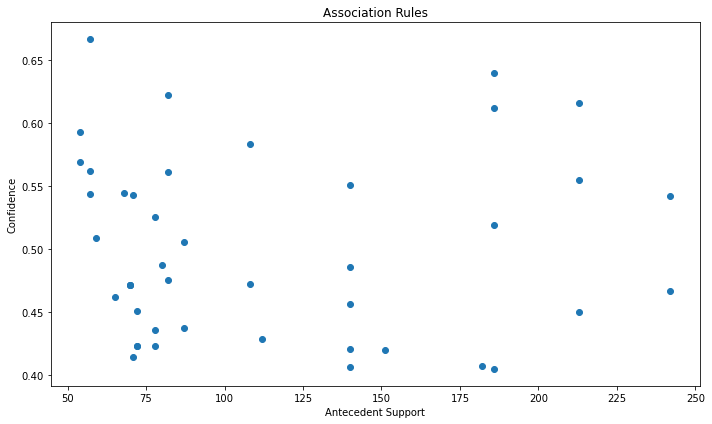

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


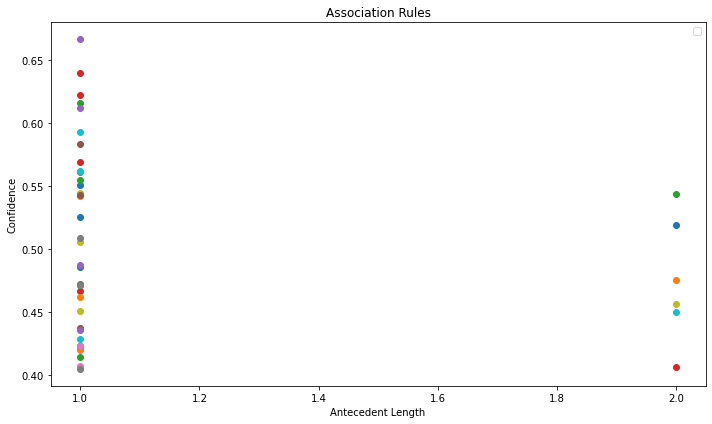

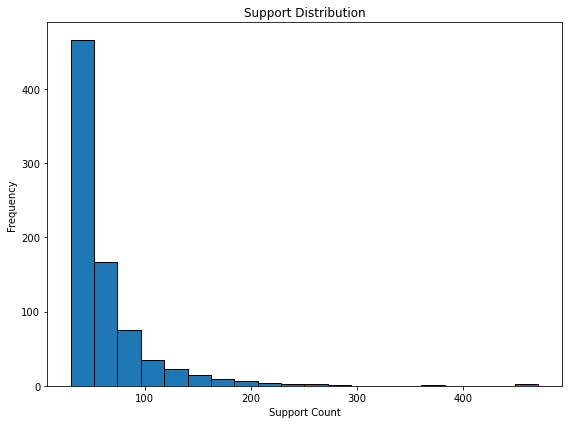

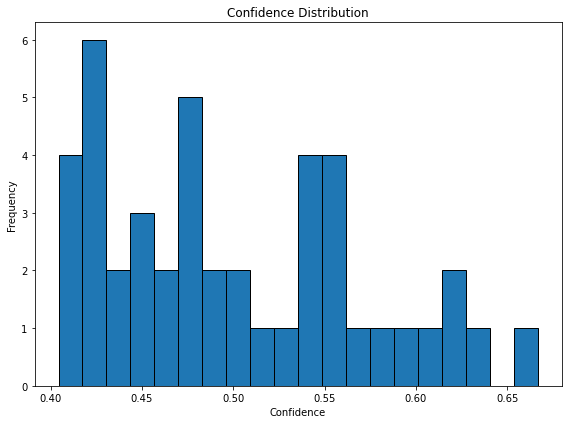

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming frequent_itemsets is the list of frequent itemsets in the format [(itemset, tids), ...]
# and association_rules is the list of association rules in the format [(antecedent, consequent, confidence), ...]

# Plot frequent itemsets
itemsets = [itemset for itemset, _ in frequent_itemsets]
support_counts = [len(tids) for _, tids in frequent_itemsets]

fig, ax = plt.subplots(figsize=(12, 6))
x = range(len(itemsets))
ax.bar(x, support_counts)
ax.set_xticks(x)
ax.set_xticklabels([str(itemset) for itemset in itemsets], rotation=45, ha='right')
ax.set_xlabel('Frequent Itemsets')
ax.set_ylabel('Support Count')
ax.set_title('Frequent Itemsets')
plt.tight_layout()
plt.show()


# Extract antecedent_supports, consequent_supports, and confidences
antecedent_supports = [len(vertical_data[item]) for rule in association_rules for item in rule[0]]
consequent_supports = [len(vertical_data[item]) for rule in association_rules for item in rule[1]]
confidences = [rule[2] for rule in association_rules]

# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(antecedent_supports, confidences)
ax.set_xlabel('Antecedent Support')
ax.set_ylabel('Confidence')
ax.set_title('Association Rules')

# Show the plot
plt.tight_layout()
plt.show()

# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
for rule in association_rules:
    antecedent, consequent, confidence = rule
    antecedent_length = len(antecedent)
    consequent_length = len(consequent)
    ax.scatter(consequent_length, confidence, )

ax.set_xlabel('Antecedent Length')
ax.set_ylabel('Confidence')
ax.set_title('Association Rules')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Plot support distribution
fig, ax = plt.subplots(figsize=(8, 6))
support_counts = np.array([len(tids) for _, tids in frequent_itemsets])
ax.hist(support_counts, bins=20, edgecolor='black')
ax.set_xlabel('Support Count')
ax.set_ylabel('Frequency')
ax.set_title('Support Distribution')
plt.tight_layout()
plt.show()

# Plot confidence distribution
fig, ax = plt.subplots(figsize=(8, 6))
confidences = [rule[2] for rule in association_rules]
ax.hist(confidences, bins=20, edgecolor='black')
ax.set_xlabel('Confidence')
ax.set_ylabel('Frequency')
ax.set_title('Confidence Distribution')
plt.tight_layout()
plt.show()

Generating association rules: 100%|██████████| 269/269 [00:00<?, ?it/s]


Frequent Itemsets:
Itemset: frozenset({'The Street Lawyer'}), Support: 118
Itemset: frozenset({'The Pillars of the Earth'}), Support: 66
Itemset: frozenset({'Angels &amp; Demons'}), Support: 252
Itemset: frozenset({'The Beach House'}), Support: 128
Itemset: frozenset({'Midnight in the Garden of Good and Evil: A Savannah Story'}), Support: 77
Itemset: frozenset({'Little Altars Everywhere: A Novel'}), Support: 129
Itemset: frozenset({'Fahrenheit 451'}), Support: 137
Itemset: frozenset({"The Bonesetter's Daughter"}), Support: 95
Itemset: frozenset({'Animal Farm'}), Support: 92
Itemset: frozenset({'Harry Potter and the Goblet of Fire (Book 4)'}), Support: 183
Itemset: frozenset({'Harry Potter and the Chamber of Secrets (Book 2)'}), Support: 240
Itemset: frozenset({'The Subtle Knife (His Dark Materials, Book 2)'}), Support: 87
Itemset: frozenset({'The Secret Life of Bees'}), Support: 275
Itemset: frozenset({'1984'}), Support: 110
Itemset: frozenset({'American Gods'}), Support: 111
Itemset: 

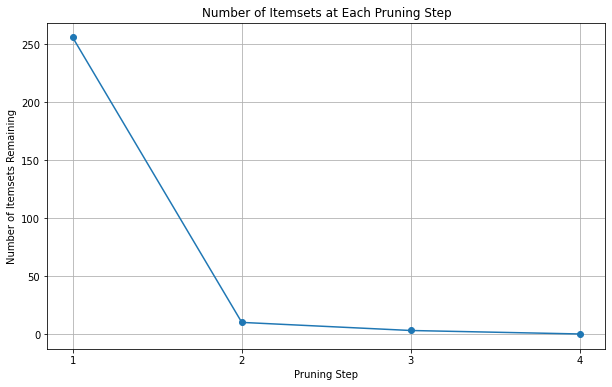

In [ ]:
import matplotlib.pyplot as plt
from itertools import combinations
from collections import defaultdict
from tqdm import tqdm

def apriori_optimized_with_tracking(transactions, min_support, min_confidence):
    itemsets = defaultdict(int)
    pruning_steps = []  # To track the number of itemsets at each pruning step
    transactions = [set(t) for t in transactions]  # Convert transactions to sets for fast operations

    # Initial pass to get frequent 1-itemsets
    for transaction in tqdm(transactions, desc="Counting single-item supports"):
        for item in transaction:
            itemsets[frozenset([item])] += 1

    # Filter out non-frequent itemsets
    itemsets = {item: count for item, count in itemsets.items() if count >= min_support}
    frequent_itemsets = list(itemsets.keys())
    pruning_steps.append(len(frequent_itemsets))  # Record number of frequent 1-itemsets

    k = 2
    while frequent_itemsets:
        new_candidates = set()
        # Generate new candidate itemsets
        for i in tqdm(range(len(frequent_itemsets)), desc=f"Generating {k}-itemsets candidates"):
            for j in range(i + 1, len(frequent_itemsets)):
                candidate = frequent_itemsets[i].union(frequent_itemsets[j])
                if len(candidate) == k:
                    new_candidates.add(candidate)

        candidate_count = defaultdict(int)
        # Count support for new candidates
        for transaction in tqdm(transactions, desc="Counting support for new candidates"):
            for candidate in new_candidates:
                if candidate.issubset(transaction):
                    candidate_count[candidate] += 1

        # Filter and retain only those itemsets with sufficient support
        new_candidates = {c: count for c, count in tqdm(candidate_count.items(), desc="Filtering new candidates") if count >= min_support}
        pruning_steps.append(len(new_candidates))  # Record number after pruning
        if not new_candidates:
            break

        itemsets.update(new_candidates)
        frequent_itemsets = list(new_candidates.keys())
        k += 1

    # Generate association rules
    association_rules = generate_association_rules(itemsets, min_confidence)
    return itemsets, association_rules, pruning_steps

def generate_association_rules(frequent_itemsets, min_confidence):
    """Generate association rules from frequent itemsets with a given minimum confidence."""
    rules = []
    for itemset, itemset_support in tqdm(frequent_itemsets.items(), desc="Generating association rules"):
        if len(itemset) > 1:
            for i in range(1, len(itemset)):
                for antecedent in combinations(itemset, i):
                    antecedent = frozenset(antecedent)
                    consequent = itemset - antecedent
                    antecedent_support = frequent_itemsets[antecedent]
                    confidence = itemset_support / antecedent_support
                    if confidence >= min_confidence:
                        rules.append((antecedent, consequent, confidence))
    return rules

# Usage
min_support = 60  # Adjust based on your data scale
min_confidence = 0.5  # Confidence threshold

frequent_itemsets, association_rules, pruning_steps = apriori_optimized_with_tracking(transactions, min_support, min_confidence)

print("Frequent Itemsets:")
for itemset, support in frequent_itemsets.items():
    print(f"Itemset: {itemset}, Support: {support}")

print("\nAssociation Rules:")
for antecedent, consequent, confidence in association_rules:
    print(f"{antecedent} => {consequent}, Confidence: {confidence:.2f}")

# Plot the number of itemsets remaining after each pruning step
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pruning_steps) + 1), pruning_steps, marker='o')
plt.title('Number of Itemsets at Each Pruning Step')
plt.xlabel('Pruning Step')
plt.ylabel('Number of Itemsets Remaining')
plt.xticks(range(1, len(pruning_steps) + 1))  # Set x-ticks to match the number of pruning steps
plt.grid(True)
plt.show()


### **Frequent Pattern Tree (FP-Growth Algorithm)**
The FP-Growth algorithm is an efficient and scalable method for mining the complete set of frequent itemsets, which are collections of items that appear together frequently in a transactional dataset. It uses a special data structure called an FP-tree (Frequent Pattern Tree), which is a compact representation of the transaction database. The steps:


1.   **Frequency Counting**: Compute the support count freq(i) for each item i in the dataset D, which consists of n transactions.
2.   **FP-Tree Construction**: Create the FP-tree T as follows:
        1.   Initialize T with a root node representing the null set.
        2.   Insert each transaction t into T after ordering its items by decreasing freq(i).


3.   FP-Tree Mining: Recursively mine T to extract frequent itemsets:
        1.   For each item i, construct its conditional FP-tree T_i from T.
        2.   Recursively mine T_i, appending i to the fenerated itemsets.


The recursion continues until all frequent itemsets are enumerated. The support of a potential frequent itemset X is calculated as the number of transactions in the conditional FP tree of X that contain X. The process leverages the principle that if X is a frequent itemset, any subset of X must also be frequent.












In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules
import pandas as pd
pd.set_option('display.max_colwidth', None)
# Filter the relevant columns
grouped_df = final.groupby('userID')['bookTitle'].apply(list).reset_index()

# Initialize the TransactionEncoder
transEncoder = TransactionEncoder()

# Fit and transform the transaction data
# Pass the list of transactions, not the entire DataFrame
transEncoder_ary = transEncoder.fit(grouped_df['bookTitle']).transform(grouped_df['bookTitle'])

# Convert the array of encoded transactions into a DataFrame
df_fp_final = pd.DataFrame(transEncoder_ary, columns=transEncoder.columns_)

# Generate frequent itemsets
frequent_itemsets = fpgrowth(df_fp_final, min_support=0.0008, use_colnames=True)

rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.4)
selected_columns = ['antecedents', 'consequents', 'support', 'confidence']
filtered_rules = rules[selected_columns]
print(filtered_rules)


                                                                                                               antecedents  \
0                                                                       (Harry Potter and the Chamber of Secrets (Book 2))   
1                                                                      (Harry Potter and the Prisoner of Azkaban (Book 3))   
2     (Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)), Harry Potter and the Chamber of Secrets (Book 2))   
3    (Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)), Harry Potter and the Prisoner of Azkaban (Book 3))   
4                                                                      (Harry Potter and the Prisoner of Azkaban (Book 3))   
..                                                                                                                     ...   
138                                                               (The Return of the King (The Lord of the Rings, Part

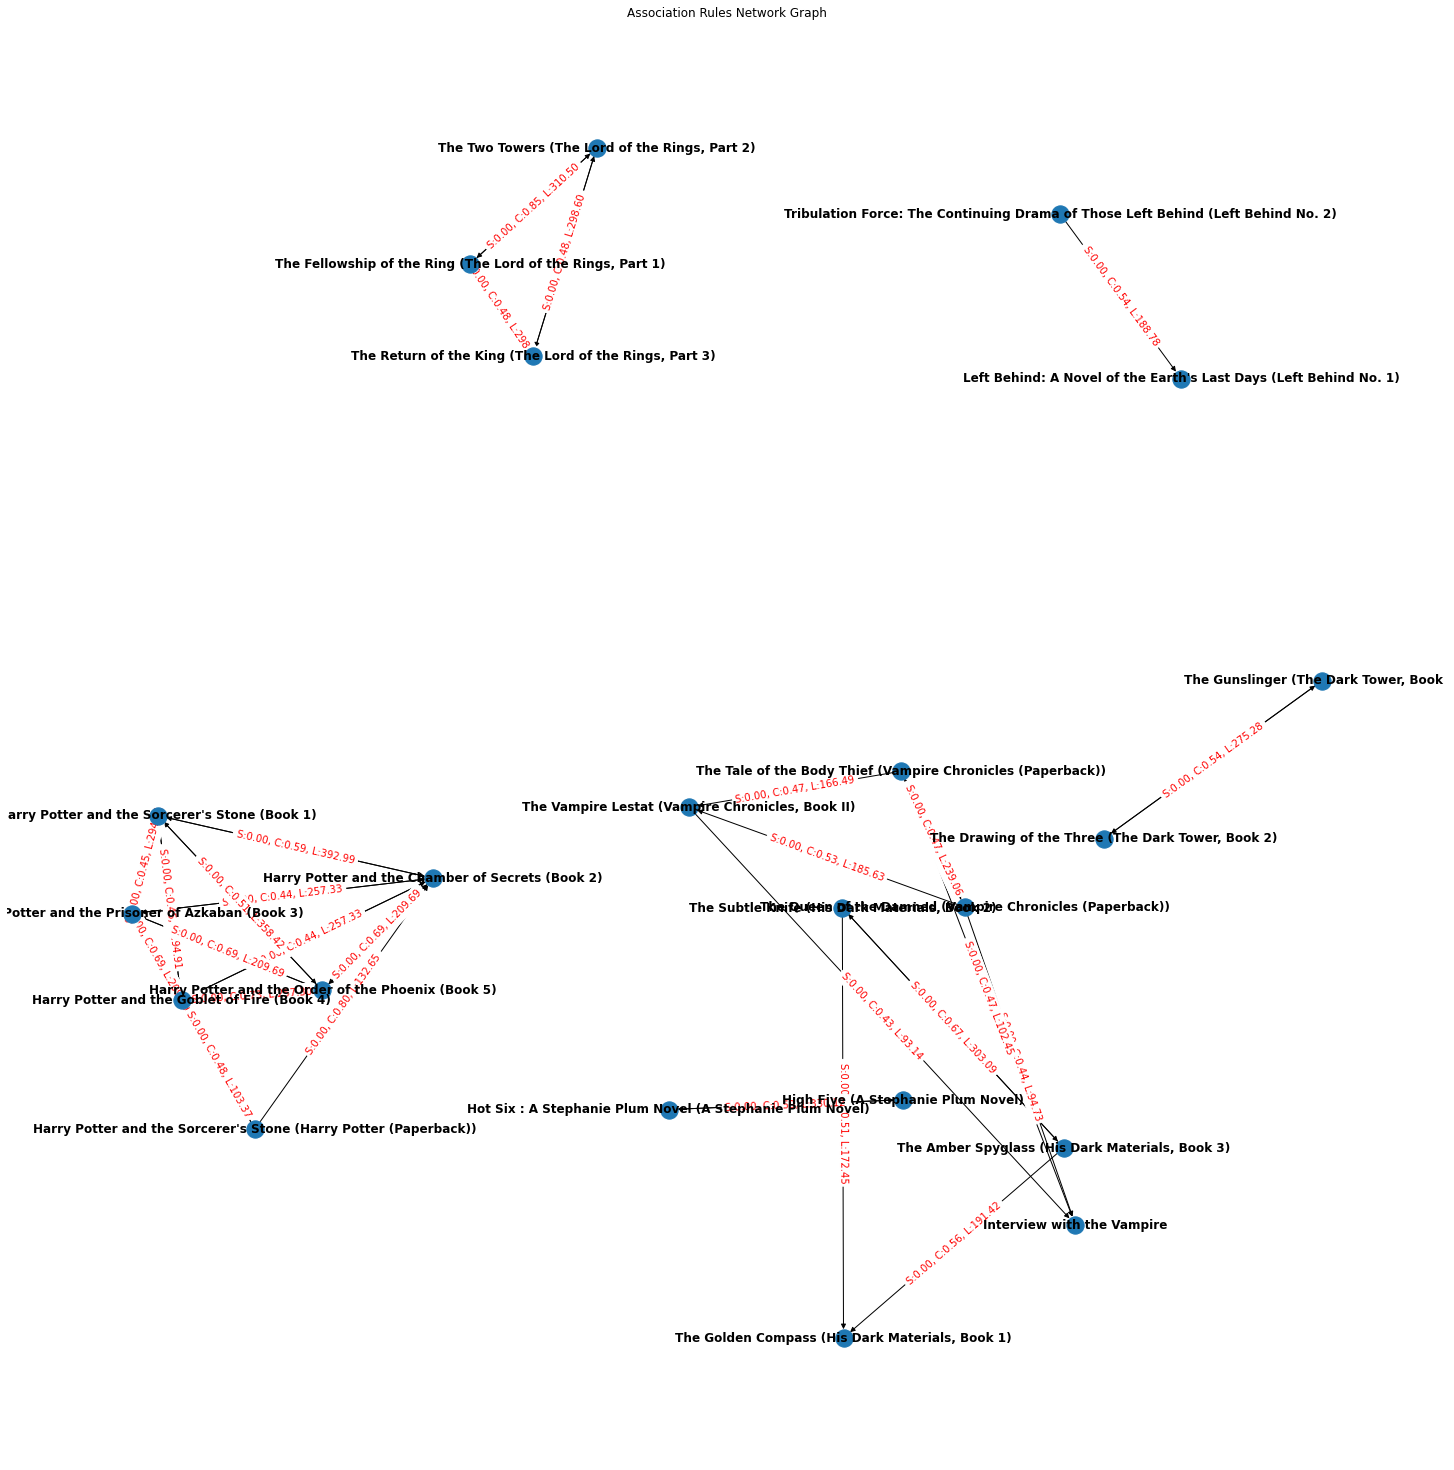

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a network graph
G = nx.DiGraph()

# Add nodes and edges from the association rules
for _, rule in rules.iterrows():
    antecedents = tuple(rule['antecedents'])
    consequents = tuple(rule['consequents'])
    support = rule['support']
    confidence = rule['confidence']
    lift = rule['lift']

    # Consider each antecedent-consequent pair as an edge
    for ant in antecedents:
        for con in consequents:
            G.add_node(ant)
            G.add_node(con)
            G.add_edge(ant, con, support=support, confidence=confidence, lift=lift)

# Draw the network graph
plt.figure(figsize=(20,20))
pos = nx.spring_layout(G, k=0.8)
nx.draw(G, pos, with_labels=True, font_weight='bold')
edge_labels = {(u, v): f"S:{d['support']:.2f}, C:{d['confidence']:.2f}, L:{d['lift']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red',font_size=10)
plt.title('Association Rules Network Graph')
plt.show()


C:\Users\saiad\AppData\Local\Temp\ipykernel_15844\1960764104.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rule['lift_bins'] = pd.qcut(filtered_rule['lift'], q=10)


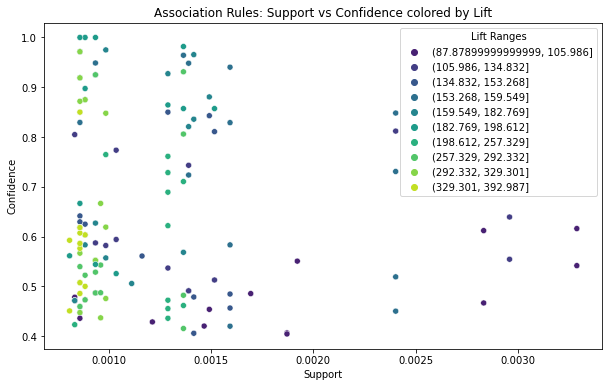

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

filtered_rule = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
filtered_rule['lift_bins'] = pd.qcut(filtered_rule['lift'], q=10)

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=filtered_rule,
    x='support',
    y='confidence',
    hue='lift_bins',
    palette='viridis',
    legend='full'
)

plt.title('Association Rules: Support vs Confidence colored by Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
scatter.legend(title='Lift Ranges', loc='upper right')

plt.show()


Getting frequent single-item itemsets: 100%|██████████| 884/884 [00:00<00:00, 885542.09it/s]


[]


Generating candidates (k=2): 0it [00:00, ?it/s]
Counting single-item supports: 100%|██████████| 200/200 [00:00<00:00, 100066.90it/s]
Generating association rules: 0it [00:00, ?it/s]
Getting frequent single-item itemsets: 100%|██████████| 993/993 [00:00<?, ?it/s]


[([700], [1, 64, 89, 179, 219, 272, 287, 347, 358, 447]), ([480], [2, 108, 132, 134, 223, 280, 351, 384, 390, 396]), ([929], [3, 20, 96, 112, 147, 154, 191, 252, 367, 370]), ([669], [4, 60, 132, 183, 279, 281, 308, 361, 372, 381, 410, 422]), ([968], [5, 16, 28, 124, 129, 172, 229, 325, 331, 475]), ([346], [5, 24, 58, 149, 167, 168, 187, 343, 361, 433, 484]), ([920], [7, 84, 118, 145, 205, 223, 250, 282, 284, 285, 310, 443, 447]), ([897], [7, 19, 82, 142, 158, 188, 369, 396, 397, 497]), ([654], [8, 108, 124, 178, 247, 303, 316, 318, 329, 340, 345, 469]), ([120], [8, 18, 207, 212, 225, 316, 373, 398, 447, 454]), ([41], [8, 94, 102, 132, 287, 296, 309, 313, 380, 428]), ([73], [10, 64, 185, 225, 292, 361, 387, 420, 450, 465]), ([504], [13, 27, 78, 121, 219, 287, 322, 374, 377, 413, 416]), ([695], [14, 140, 147, 161, 175, 230, 324, 413, 441, 466, 467]), ([532], [14, 18, 105, 169, 183, 251, 256, 340, 377, 497]), ([75], [15, 57, 86, 227, 266, 286, 356, 387, 402, 424, 484]), ([989], [16, 65, 8

Generating candidates (k=2): 1378it [00:00, 76568.20it/s]
Getting frequent single-item itemsets: 100%|██████████| 1000/1000 [00:00<00:00, 1002223.18it/s]


[([306], [0, 45, 117, 160, 204, 320, 459, 519, 556, 626, 651, 789, 860]), ([515], [0, 10, 18, 142, 155, 409, 495, 669, 679, 681, 823, 899]), ([627], [0, 44, 136, 299, 372, 375, 434, 513, 521, 581, 590, 810, 874, 969]), ([47], [0, 63, 147, 221, 259, 404, 445, 451, 592, 722, 732]), ([200], [0, 143, 250, 315, 424, 443, 459, 507, 611, 690, 757, 763, 783, 886, 918, 952]), ([990], [1, 33, 40, 77, 100, 353, 358, 359, 461, 561, 819]), ([190], [1, 15, 81, 447, 500, 619, 705, 761, 766, 816]), ([910], [1, 11, 91, 358, 431, 615, 695, 699, 788, 797, 993]), ([555], [1, 150, 279, 360, 380, 383, 501, 819, 823, 873]), ([821], [1, 12, 39, 46, 148, 176, 189, 212, 238, 294, 365, 577, 598, 620, 663, 700, 763, 883]), ([219], [1, 24, 173, 265, 274, 286, 541, 563, 599, 752, 902]), ([976], [1, 98, 242, 307, 403, 486, 582, 755, 796, 983]), ([62], [1, 56, 64, 107, 127, 253, 368, 374, 376, 505, 608, 668, 788, 865]), ([495], [1, 162, 399, 484, 599, 612, 653, 655, 949, 976]), ([288], [1, 162, 304, 328, 477, 543, 57

Generating candidates (k=2): 180300it [00:13, 13397.54it/s]
Getting frequent single-item itemsets: 100%|██████████| 1000/1000 [00:00<00:00, 1000310.99it/s]


[([184], [0, 31, 36, 113, 189, 215, 295, 447, 507, 522, 600, 688, 1095, 1097, 1547, 1560, 1685, 1763, 1821, 1935, 1976]), ([535], [0, 204, 237, 269, 390, 604, 816, 834, 1026, 1048, 1112, 1122, 1245, 1333, 1363, 1488, 1638, 1921]), ([425], [1, 207, 224, 400, 402, 407, 483, 486, 570, 613, 662, 820, 864, 869, 987, 1025, 1056, 1207, 1273, 1276, 1278, 1308, 1410, 1466, 1763, 1922, 1951, 1964]), ([441], [1, 244, 383, 485, 570, 607, 626, 690, 879, 949, 953, 1045, 1077, 1478, 1676, 1701, 1738, 1767, 1844, 1872, 1926, 1958]), ([354], [1, 200, 204, 478, 483, 553, 595, 756, 805, 1022, 1194, 1295, 1320, 1434, 1607, 1696, 1803, 1850, 1958, 1985, 1997]), ([671], [1, 47, 162, 183, 400, 405, 604, 636, 690, 767, 773, 805, 974, 1006, 1352, 1543, 1548, 1825, 1906]), ([244], [1, 172, 230, 255, 407, 464, 538, 542, 572, 642, 682, 1006, 1035, 1102, 1276, 1354, 1426, 1480, 1512, 1546, 1622, 1834, 1984]), ([880], [1, 51, 194, 215, 235, 277, 299, 507, 606, 870, 947, 959, 1015, 1036, 1098, 1157, 1383, 1424, 1510

Generating candidates (k=2): 498501it [01:01, 8088.29it/s]
Generating association rules: 100%|██████████| 999/999 [00:00<00:00, 1000742.70it/s]


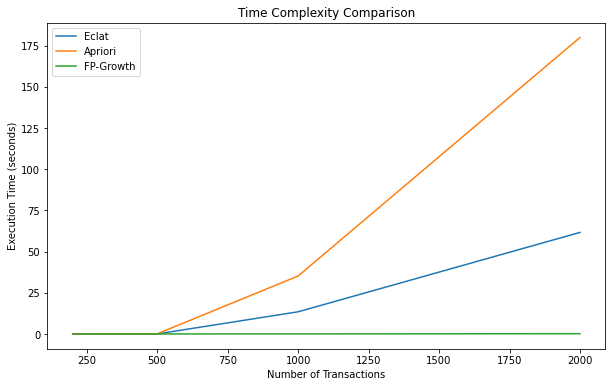

In [ ]:
import time
import random
from pyfpgrowth import pyfpgrowth
import matplotlib.pyplot as plt

# Function to generate synthetic transaction dataset
def generate_transactions(num_transactions, num_items, max_transaction_length):
    transactions = []
    for _ in range(num_transactions):
        transaction_length = random.randint(1, max_transaction_length)
        transaction = random.sample(range(num_items), transaction_length)
        transactions.append(transaction)
    return transactions

# Functions to run the Eclat, Apriori, and FP-Growth algorithms
# (You need to provide these functions or import them from your existing code)
def run_eclat(transactions, min_support):
    start_time = time.time()
    eclat(transactions, min_support)
    end_time = time.time()
    return end_time - start_time

def run_apriori(transactions, min_support):
    start_time = time.time()
    apriori_optimized_with_tracking(transactions, min_support, 0.5)
    end_time = time.time()
    return end_time - start_time

def run_fp_growth(transactions, min_support):
    start_time = time.time()
    pyfpgrowth.find_frequent_patterns(transactions, min_support)
    end_time = time.time()
    return end_time - start_time

# Example usage
num_items = 1000
max_transaction_length = 20
min_support = 10

# Generate transaction datasets with varying sizes
dataset_sizes = [200, 500, 1000, 2000]
eclat_times = []
apriori_times = []
fp_growth_times = []

for num_transactions in dataset_sizes:
    transactions = generate_transactions(num_transactions, num_items, max_transaction_length)

    eclat_time = run_eclat(transactions, min_support)
    apriori_time = run_apriori(transactions, min_support)
    fp_growth_time = run_fp_growth(transactions, min_support)

    eclat_times.append(eclat_time)
    apriori_times.append(apriori_time)
    fp_growth_times.append(fp_growth_time)

# Plot the execution times
plt.figure(figsize=(10, 6))
plt.plot(dataset_sizes, eclat_times, label='Eclat')
plt.plot(dataset_sizes, apriori_times, label='Apriori')
plt.plot(dataset_sizes, fp_growth_times, label='FP-Growth')
plt.xlabel('Number of Transactions')
plt.ylabel('Execution Time (seconds)')
plt.title('Time Complexity Comparison')
plt.legend()
plt.show()

In [42]:
# Load the dataset
data_raw = pd.read_csv('Assignment-1_Data.csv\Assignment-1_Data.csv', sep=';')
data_raw.head()

C:\Users\saiad\AppData\Local\Temp\ipykernel_8884\3739032551.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv('Assignment-1_Data.csv\Assignment-1_Data.csv', sep=';')


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [43]:
# Get a summary of the dataset
print(data_raw.shape)
print(data_raw.info())

(522064, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB
None


In [44]:
# Converting Date Column
data_raw['Date'] = pd.to_datetime(data_raw['Date'], format='%d.%m.%Y %H:%M')
data_raw['YearMonth'] = data_raw['Date'].dt.to_period('M')

In [45]:
# We notice that 'Price' column has commas in the numeric values, let's replace them and convert it to float
data_raw['Price'] = data_raw['Price'].str.replace(',', '.').astype(float)

In [46]:
# We check for missing values in the dataset across all columns.
missing_values = data_raw.isnull().sum()
print(missing_values)

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
YearMonth          0
dtype: int64


In [47]:
# Descriptive Statistics 
data_raw.describe()

,Quantity,Price,CustomerID
count,522064.000000,522064.000000,388023.000000
mean,10.090435,3.826801,15316.931710
std,161.110525,41.900599,1721.846964
min,-9600.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13950.000000
50%,3.000000,2.080000,15265.000000
75%,10.000000,4.130000,16837.000000
max,80995.000000,13541.330000,18287.000000


In [48]:
# Filtering the dataset to include only rows with values > 0
data = data_raw[(data_raw['Quantity']>0) & (data_raw['Price']>0)]

In [49]:
# Dropping rows without item 
data = data[data['Itemname'].notnull()]

In [50]:
# Filling missing customer IDs
data = data.fillna('#NV')

In [51]:
# Calculate total price per pos / transaction
data['TotalPrice'] = data['Quantity'] * data['Price']

In [52]:
data.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,YearMonth,TotalPrice
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34


In [53]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519551 entries, 0 to 522063
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      519551 non-null  object        
 1   Itemname    519551 non-null  object        
 2   Quantity    519551 non-null  int64         
 3   Date        519551 non-null  datetime64[ns]
 4   Price       519551 non-null  float64       
 5   CustomerID  519551 non-null  object        
 6   Country     519551 non-null  object        
 7   YearMonth   519551 non-null  period[M]     
 8   TotalPrice  519551 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4), period[M](1)
memory usage: 39.6+ MB
None


In [54]:
# Group by userID and aggregate bookTitles
grouped_df = data.groupby('BillNo')['Itemname'].apply(list).reset_index()
transactional_df = pd.DataFrame(grouped_df['Itemname'].tolist(), index=grouped_df['BillNo']).reset_index()
transactional_df.columns = ['BillNo'] + [f'Item{i+1}' for i in range(transactional_df.shape[1]-1)]
# transactional_df = transactional_df.fillna('')
transactional_df.tail()

,BillNo,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Item9,...,Item1105,Item1106,Item1107,Item1108,Item1109,Item1110,Item1111,Item1112,Item1113,Item1114
19556,572055,CHRISTMAS LIGHTS 10 VINTAGE BAUBLES,SET OF 6 T-LIGHTS CACTI,SET OF 6 T-LIGHTS SANTA,MOROCCAN BEATEN METAL DISH,RECYCLED ACAPULCO MAT RED,MIRROR MOSAIC CANDLE PLATE,RED HANGING HEART T-LIGHT HOLDER,RED RETROSPOT TISSUE BOX,BLUE DISCO HANDBAG,...,None,None,None,None,None,None,None,None,None,None
19557,572056,POSTAGE,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
19558,572057,TEA TIME OVEN GLOVE,FRYING PAN UNION FLAG,NOVELTY BISCUITS CAKE STAND 3 TIER,MINI CAKE STAND WITH HANGING CAKES,MINI CAKE STAND HANGING STRAWBERY,"FEATHER PEN,HOT PINK",None,None,None,...,None,None,None,None,None,None,None,None,None,None
19559,572058,DOOR HANGER MUM + DADS ROOM,BAKING MOULD CHOCOLATE CUPCAKES,SET/10 BLUE POLKADOT PARTY CANDLES,SET/3 ROSE CANDLE IN JEWELLED BOX,SET/3 OCEAN SCENT CANDLE JEWEL BOX,HAND WARMER BABUSHKA DESIGN,ENGLISH ROSE GARDEN SECATEURS,SET/10 PINK POLKADOT PARTY CANDLES,JUMBO BAG PINK POLKADOT,...,None,None,None,None,None,None,None,None,None,None
19560,A563185,Adjust bad debt,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [55]:
transaction_data2=transactional_df

In [59]:
transactions = convert_to_transactions(transaction_data2)
min_support = 500
min_confidence = 0.4

frequent_itemsets, vertical_data = eclat(transactions, min_support)
association_rules = generate_association_rules(frequent_itemsets, vertical_data, min_confidence)

# Print the frequent itemsets
print("Frequent Itemsets:")
for itemset, tids in frequent_itemsets:
    print(f"Itemset: {itemset}, Support: {len(tids)}")

# Print the association rules
print("\nAssociation Rules:")
cnt = 0
for antecedent, consequent, confidence in association_rules:
    print(f"{cnt}::{antecedent} => {consequent}, Confidence: {confidence:.2f}")
    cnt += 1

Converting transaction data to transactions: 19561it [00:17, 1091.54it/s]
Getting frequent single-item itemsets: 100%|██████████| 4006/4006 [00:00<00:00, 2002906.40it/s]


[(['WHITE HANGING HEART T-LIGHT HOLDER'], [0, 8, 10, 23, 26, 28, 33, 38, 57, 60, 80, 81, 103, 104, 117, 119, 121, 127, 129, 133, 135, 138, 152, 154, 176, 178, 197, 198, 200, 208, 221, 224, 229, 248, 252, 256, 272, 274, 278, 283, 305, 309, 314, 320, 336, 338, 343, 343, 346, 346, 347, 359, 360, 370, 375, 403, 417, 428, 430, 431, 433, 452, 455, 456, 482, 487, 489, 493, 504, 509, 513, 518, 522, 525, 538, 541, 553, 554, 555, 556, 559, 565, 583, 584, 592, 595, 601, 604, 609, 633, 634, 641, 646, 646, 650, 660, 680, 684, 687, 694, 695, 714, 715, 718, 736, 741, 742, 748, 757, 758, 766, 771, 772, 777, 784, 788, 803, 813, 816, 825, 826, 831, 835, 838, 846, 862, 863, 864, 865, 872, 879, 887, 888, 903, 905, 907, 907, 910, 917, 918, 921, 923, 929, 935, 939, 945, 950, 951, 952, 960, 964, 967, 970, 976, 977, 983, 1002, 1008, 1011, 1018, 1021, 1029, 1037, 1038, 1050, 1055, 1064, 1066, 1067, 1088, 1112, 1115, 1119, 1122, 1126, 1136, 1139, 1148, 1149, 1152, 1178, 1187, 1188, 1199, 1200, 1204, 1215, 1218,

Generating candidates (k=2): 17391it [02:15, 128.71it/s]


[(['ALARM CLOCK BAKELIKE RED', 'ALARM CLOCK BAKELIKE GREEN'], [5, 22, 27, 71, 126, 149, 207, 227, 228, 234, 309, 334, 343, 343, 343, 351, 357, 373, 373, 377, 377, 377, 377, 385, 456, 478, 503, 506, 513, 560, 572, 584, 593, 593, 601, 659, 680, 704, 757, 777, 782, 826, 851, 880, 880, 880, 880, 881, 887, 888, 901, 908, 911, 939, 998, 1029, 1042, 1065, 1086, 1088, 1089, 1185, 1260, 1335, 1336, 1347, 1348, 1350, 1377, 1381, 1401, 1410, 1412, 1421, 1439, 1486, 1546, 1573, 1578, 1599, 1606, 1639, 1656, 1693, 1700, 1717, 1726, 1730, 1741, 1747, 1771, 1778, 1801, 1809, 1853, 1880, 2026, 2047, 2050, 2169, 2180, 2181, 2219, 2241, 2243, 2347, 2359, 2415, 2420, 2507, 2514, 2616, 2620, 2753, 2799, 2800, 2833, 2838, 2901, 2963, 2985, 3008, 3019, 3025, 3031, 3072, 3086, 3153, 3188, 3201, 3238, 3267, 3271, 3303, 3338, 3338, 3383, 3411, 3412, 3428, 3433, 3462, 3470, 3490, 3500, 3555, 3579, 3608, 3611, 3621, 3625, 3681, 3744, 3760, 3770, 3786, 3830, 3863, 3893, 3898, 3914, 3922, 3979, 3998, 3999, 4084, 4

Generating candidates (k=3): 528it [00:00, 1323.32it/s]


[(['PINK REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER'], [903, 903, 1091, 2752, 2753, 2759, 2821, 2826, 2838, 2918, 2932, 2933, 2942, 2943, 2944, 2964, 2989, 2990, 3007, 3036, 3082, 3094, 3098, 3112, 3151, 3233, 3255, 3259, 3267, 3287, 3288, 3317, 3322, 3339, 3370, 3412, 3428, 3432, 3464, 3490, 3501, 3504, 3513, 3516, 3533, 3540, 3548, 3579, 3587, 3597, 3621, 3626, 3639, 3658, 3744, 3749, 3764, 3776, 3778, 3779, 3789, 3801, 3816, 3884, 3891, 3899, 3910, 3928, 3929, 3989, 4065, 4080, 4086, 4131, 4132, 4146, 4209, 4219, 4242, 4269, 4289, 4301, 4367, 4395, 4407, 4418, 4434, 4482, 4531, 4562, 4599, 4613, 4621, 4622, 4631, 4713, 4762, 4762, 4762, 4762, 4762, 4785, 4815, 4823, 4890, 4903, 4915, 4937, 4938, 4941, 4972, 5096, 5119, 5210, 5211, 5215, 5238, 5254, 5281, 5287, 5290, 5320, 5334, 5388, 5411, 5411, 5412, 5413, 5422, 5443, 5477, 5525, 5526, 5573, 5592, 5667, 5704, 5706, 5721, 5775, 5778, 5791, 5795, 5800, 5803, 5811, 5869, 5898, 5899,

Generating candidates (k=4): 0it [00:00, ?it/s]
Generating association rules: 100%|██████████| 221/221 [00:00<00:00, 18416.90it/s]

Frequent Itemsets:
Itemset: ['WHITE HANGING HEART T-LIGHT HOLDER'], Support: 2265
Itemset: ['HAND WARMER UNION JACK'], Support: 508
Itemset: ['ASSORTED COLOUR BIRD ORNAMENT'], Support: 1465
Itemset: ['HOME BUILDING BLOCK WORD'], Support: 783
Itemset: ['LOVE BUILDING BLOCK WORD'], Support: 643
Itemset: ['DOORMAT NEW ENGLAND'], Support: 581
Itemset: ['JAM MAKING SET WITH JARS'], Support: 1097
Itemset: ['ALARM CLOCK BAKELIKE PINK'], Support: 769
Itemset: ['ALARM CLOCK BAKELIKE RED'], Support: 1050
Itemset: ['ALARM CLOCK BAKELIKE GREEN'], Support: 987
Itemset: ['VINTAGE HEADS AND TAILS CARD GAME'], Support: 600
Itemset: ['ROUND SNACK BOXES SET OF4 WOODLAND'], Support: 737
Itemset: ['SPACEBOY LUNCH BOX'], Support: 900
Itemset: ['LUNCH BOX I LOVE LONDON'], Support: 729
Itemset: ['RED TOADSTOOL LED NIGHT LIGHT'], Support: 852
Itemset: ['SET 2 TEA TOWELS I LOVE LONDON'], Support: 552
Itemset: ['POSTAGE'], Support: 1070
Itemset: ["PAPER CHAIN KIT 50'S CHRISTMAS"], Support: 1183
Itemset: ['WOOD 